<h1 style="text-align:center; font-weight: bold"> Breast Cancer Prediction Logistics Regression Model. </h1>

---

<h3 style="font-weight: 600;"> 1. Importing The Packages And Using Them Properly. </h3>

In [1]:
!pip3 install numpy matplotlib seaborn scikit-learn pandas

**Installing all the necessary packages.**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Making the necessary imports for the project.**

---

<h3 style="font-weight:600"> 2. Data Exploration </h3>

In [3]:
data = pd.read_csv('data.csv')

**Importing the data from the csv file.**

In [4]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**So, the data has a total of 569 records with 33 features utilized.**
<br />

**About the target_value (diagnosis):**
<ul>
    <li>B = Benign [Means the tumor is not cancerous (harmless, doesn’t spread).]</li>
    <li>M = Malignant [Means the tumor is cancerous (dangerous, can spread).]</li>
</ul>
<br />

**Description of the features:**
<br />
<ol>
    <li> Radius: </li>
    <ul>
        <li>How big the cell looks (distance from center to edge).</li>
        <li>Cancer link: Cancer cells are often bigger.</li>
    </ul>
    <li>Texture: </li>
    <ul>
        <li>How rough or smooth the inside of the cell looks (gray shades in the image).</li>
        <li>Cancer link: Cancer cells usually look rougher.</li>
    </ul>
    <li>Perimeter: </li>
    <ul>
        <li>The length around the cell’s edge (like measuring the outline).</li>
        <li>Cancer link: Cancer cells often have a longer outline because they’re irregular.</li>
    </ul>
    <li>Area: </li>
    <ul>
        <li>How much space the cell takes up (like filling it in).</li>
        <li>Cancer link: Bigger area = more suspicious.</li>
    </ul>
    <li>Smoothness: </li>
    <ul>
        <li>How smooth the edges are.</li>
        <li>Cancer link: Cancer cells usually have jagged, bumpy edges.</li>
    </ul>
    <li>Compactness: </li>
    <ul>
        <li>How tightly packed the cell is (compared to how spread out).</li>
        <li>Cancer link: Irregular, spread-out cells = more likely malignant.</li>
    </ul>
    <li>Concavity: </li>
    <ul>
        <li>How deeply the cell edge caves inward (like dents).</li>
        <li>Cancer link: Cancer cells have deeper dents.</li>
    </ul>
    <li>Concave Points: </li>
    <ul>
        <li>How many dents the cell edge has.</li>
        <li>Cancer link: More dents = higher cancer chance.</li>
    </ul>
    <li>Symmetry: </li>
    <ul>
        <li>Does the cell look even (like a circle) or lopsided?</li>
        <li>Cancer link: Cancer cells are often uneven/asymmetric.</li>
    </ul>
    <li>Fractal Dimension: </li>
    <ul>
        <li>How complicated or jagged the cell boundary looks (like comparing a smooth circle vs. a jagged coastline).</li>
        <li>Cancer link: More jagged = more likely malignant.</li>
    </ul>
</ol>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**As, you can see the Unnamed:32 feature has all of the data equals to null or empty, Also the id of the cancer patient or the id of the cell isn't that contributive so better to clean it.**

In [6]:
data = data.drop(['Unnamed: 32'], axis=True)

In [7]:
data = data.drop(['id'], axis=True)

**Dropping the unnecessary columns like: Unnamed:32 and id which won't contribute that much towards the application.**

In [8]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**Why 30 Features (and not just 10)?**
<br />
**Because instead of just one measurement for each characteristic, scientists look at them in three different ways:**
<br />
<br />
<ul>
    <li>Mean (Average) → What the feature looks like on average across cells. Example: Average radius of cells.</li>
    <li>Standard Error (SE) → How much the values differ (are cells all the same size, or very different?). Example: If some cells are tiny and some  are huge → suspicious.</li>
    <li>Worst (Maximum) → The most extreme value observed. Example: The largest radius seen. Even if average is normal, one giant cell might mean trouble.</li>
    <li>So: 10 features × 3 types of measurement = 30 features.</li>
</ul>
<br />

**Suppose doctors take 10 cells from one patient’s tumor. For one feature (say, radius), they measure each cell:**
<br />
**Patient X, radius readings (10 cells):**
**11, 12, 13, 12, 14, 10, 15, 12, 11, 13**
<br />
**From these 10 numbers, they calculate 3 values for this patient:**
<ol>
    <li>Mean (radius_mean) → the average of all 10 readings.</li>
    <ul>
        <li>(11+12+13+12+14+10+15+12+11+13) ÷ 10 = 12.3</li>
    </ul>
    <li>Standard Error (radius_se) → how much variation there is between the readings.</li>
    <ul>
        <li>Mean = (sum of values) ÷ n = 123 ÷ 10 = 12.3</li>
        <li>Step B: Standard Deviation (SD): 
            Find squared differences from the mean:
            (11−12.3)² = 1.69
            (12−12.3)² = 0.09
            (13−12.3)² = 0.49
            (12−12.3)² = 0.09
            (14−12.3)² = 2.89
            (10−12.3)² = 5.29
            (15−12.3)² = 7.29
            (12−12.3)² = 0.09
            (11−12.3)² = 1.69
            (13−12.3)² = 0.49
            Sum = 20.1
        </li>
        <li>Variance = 20.1 ÷ (n−1 = 9) ≈ 2.23</li>
        <li>SD = √2.23 ≈ 1.49</li>
        <li>SE = SD ÷ √n = 1.49 ÷ √10 ≈ 0.47</li>
    </ul>
    <li>Worst (radius_worst) → take the 3 largest values (15, 14, 13), then average them.</li>
    <ul>
        <li>(15+14+13) ÷ 3 = 14.0</li>
    </ul>
</ol>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**The diagnosis feature has a categorical value so it's best for the proper data conversion into numerical.**

In [10]:
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

**So, currently diagnosis is the output or the target_value of this entire dataset.**
<br/>
**There are two specific value: B (Benign) And M (Maligant) => So, binary encoding will be perfect.**

---

<h2 style="font-weight: 600"> 3. Data Preprocessing </h2>

In [11]:
data['diagnosis'] = data['diagnosis'].apply(lambda x:0 if x == 'B' else 1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [13]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**So, after successfully applying the binary encoding logic, the diagnosis column has a proper binary coded values.**

array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'cent

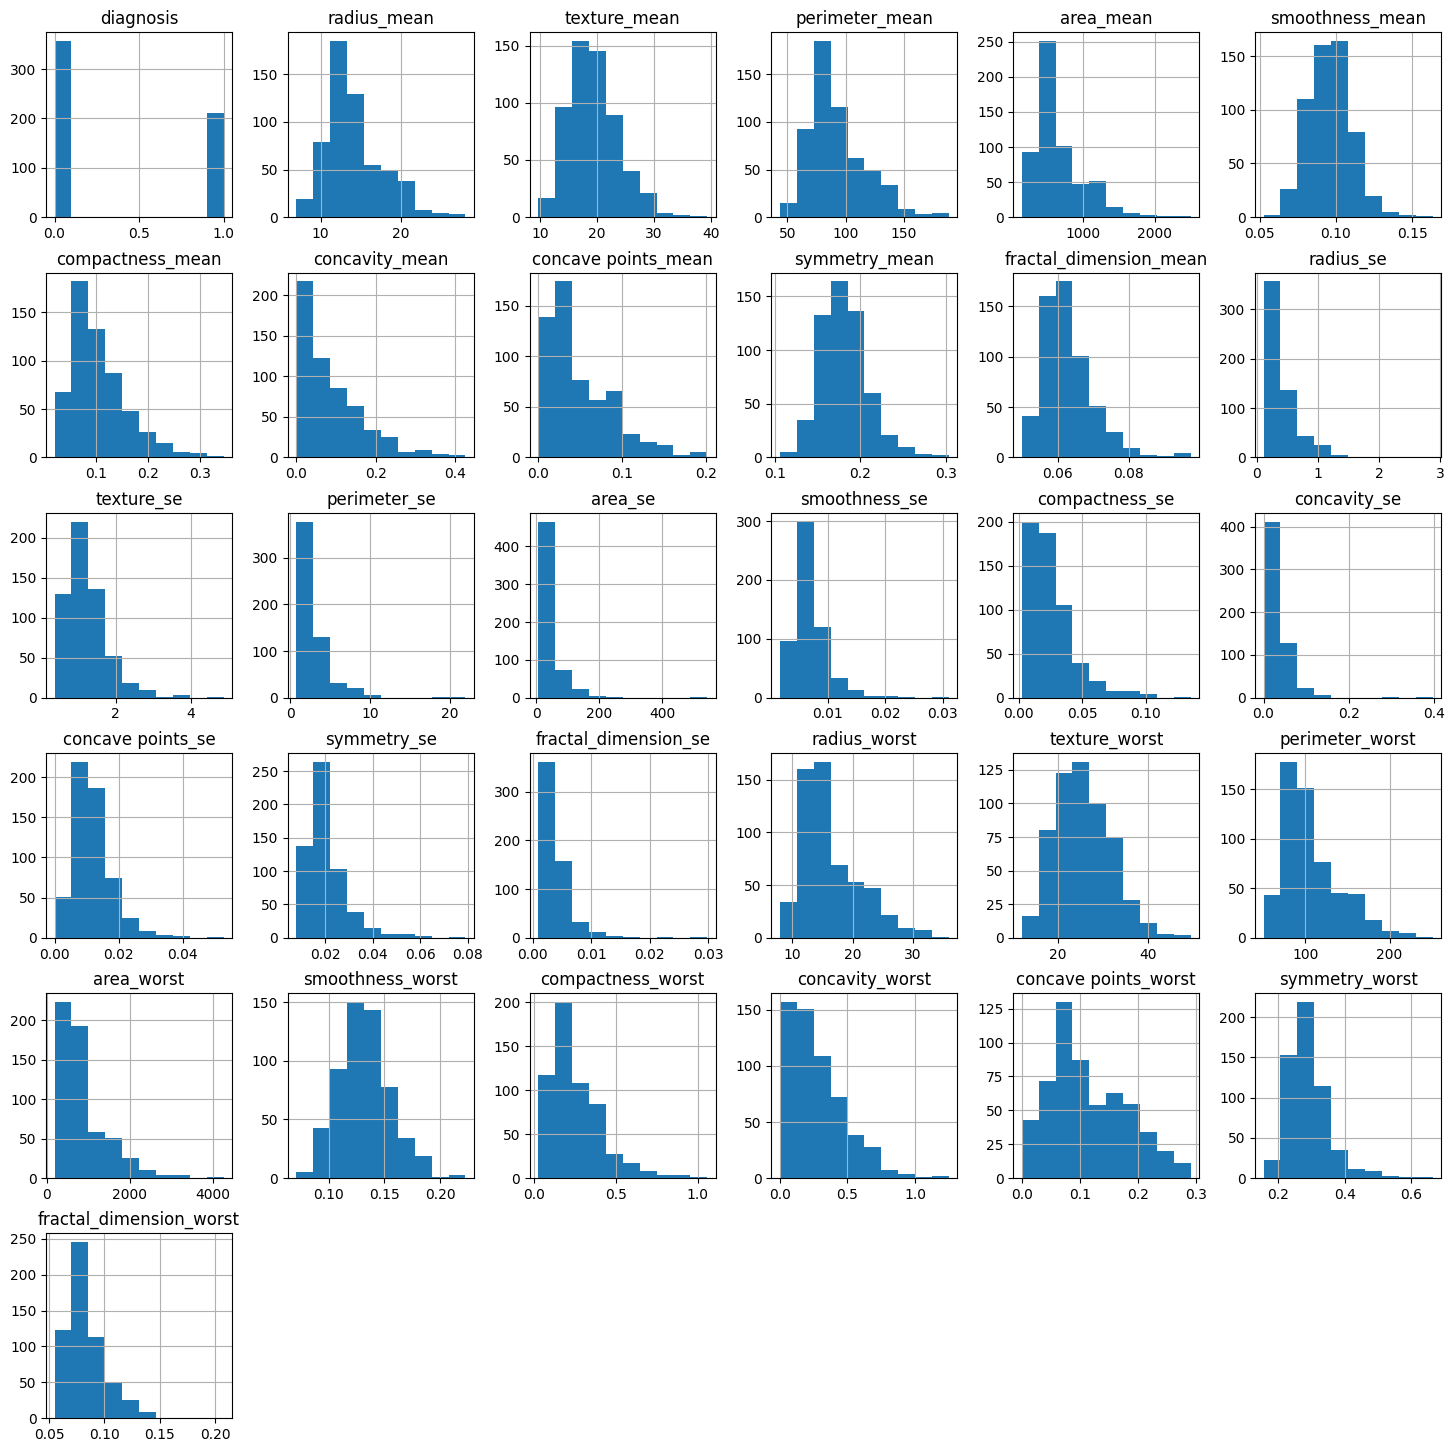

In [14]:
data.hist(figsize=(18, 18))

**Still most of the data are right-skewed and this is the most important problem. As most of the ml models take gaussian bell shape curve or symmetric distribution so we should make it symmetric using logarithmic distributions.**

In [15]:
data.skew()

diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

**This measures the skewness of the features:**
<br />
**Skewness Scale:**
<ul>
    <li>-0.5 to 0.5: Approximately symmetric (good!)</li>
    <li>0.5 to 1.0: Moderately skewed</li>
    <li>1.0 to 2.0: Highly skewed</li>
    <li>> 2.0: Very highly skewed</li>
</ul>

In [16]:
data.area_mean = np.log1p(data.area_mean)
data.texture_mean = np.log1p(data.texture_mean)
data.perimeter_mean = np.log1p(data.perimeter_mean)
data.radius_mean = np.log1p(data.radius_mean)
data['concave points_mean'] = np.log1p(data['concave points_mean'])
data.radius_se = np.log1p(data.radius_se)
data.texture_se = np.log1p(data.texture_se)
data.perimeter_se = np.log1p(data.perimeter_se)
data.area_se = np.log1p(data.area_se) 
data.smoothness_se = np.log1p(data.smoothness_se)
data.compactness_se = np.log1p(data.compactness_se)
data.concavity_se = np.log1p(data.concavity_se)
data['concave points_se'] = np.log1p(data['concave points_se'])
data.symmetry_se = np.log1p(data.symmetry_se)
data.fractal_dimension_se = np.log1p(data.fractal_dimension_se)
data.radius_worst = np.log1p(data.radius_worst)
data.perimeter_worst = np.log1p(data.perimeter_worst)
data.area_worst = np.log1p(data.area_worst)
data.compactness_worst = np.log1p(data.compactness_worst)
data.concavity_worst = np.log1p(data.concavity_worst)
data.symmetry_worst = np.log1p(data.symmetry_worst)
data.fractal_dimension_worst = np.log1p(data.fractal_dimension_worst)

**Using logartihmic distribution to avoid the right-skewness also adding with 1 to avoid a negative value as: log(0) => undefined and log(-x) => infinity.**

array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'cent

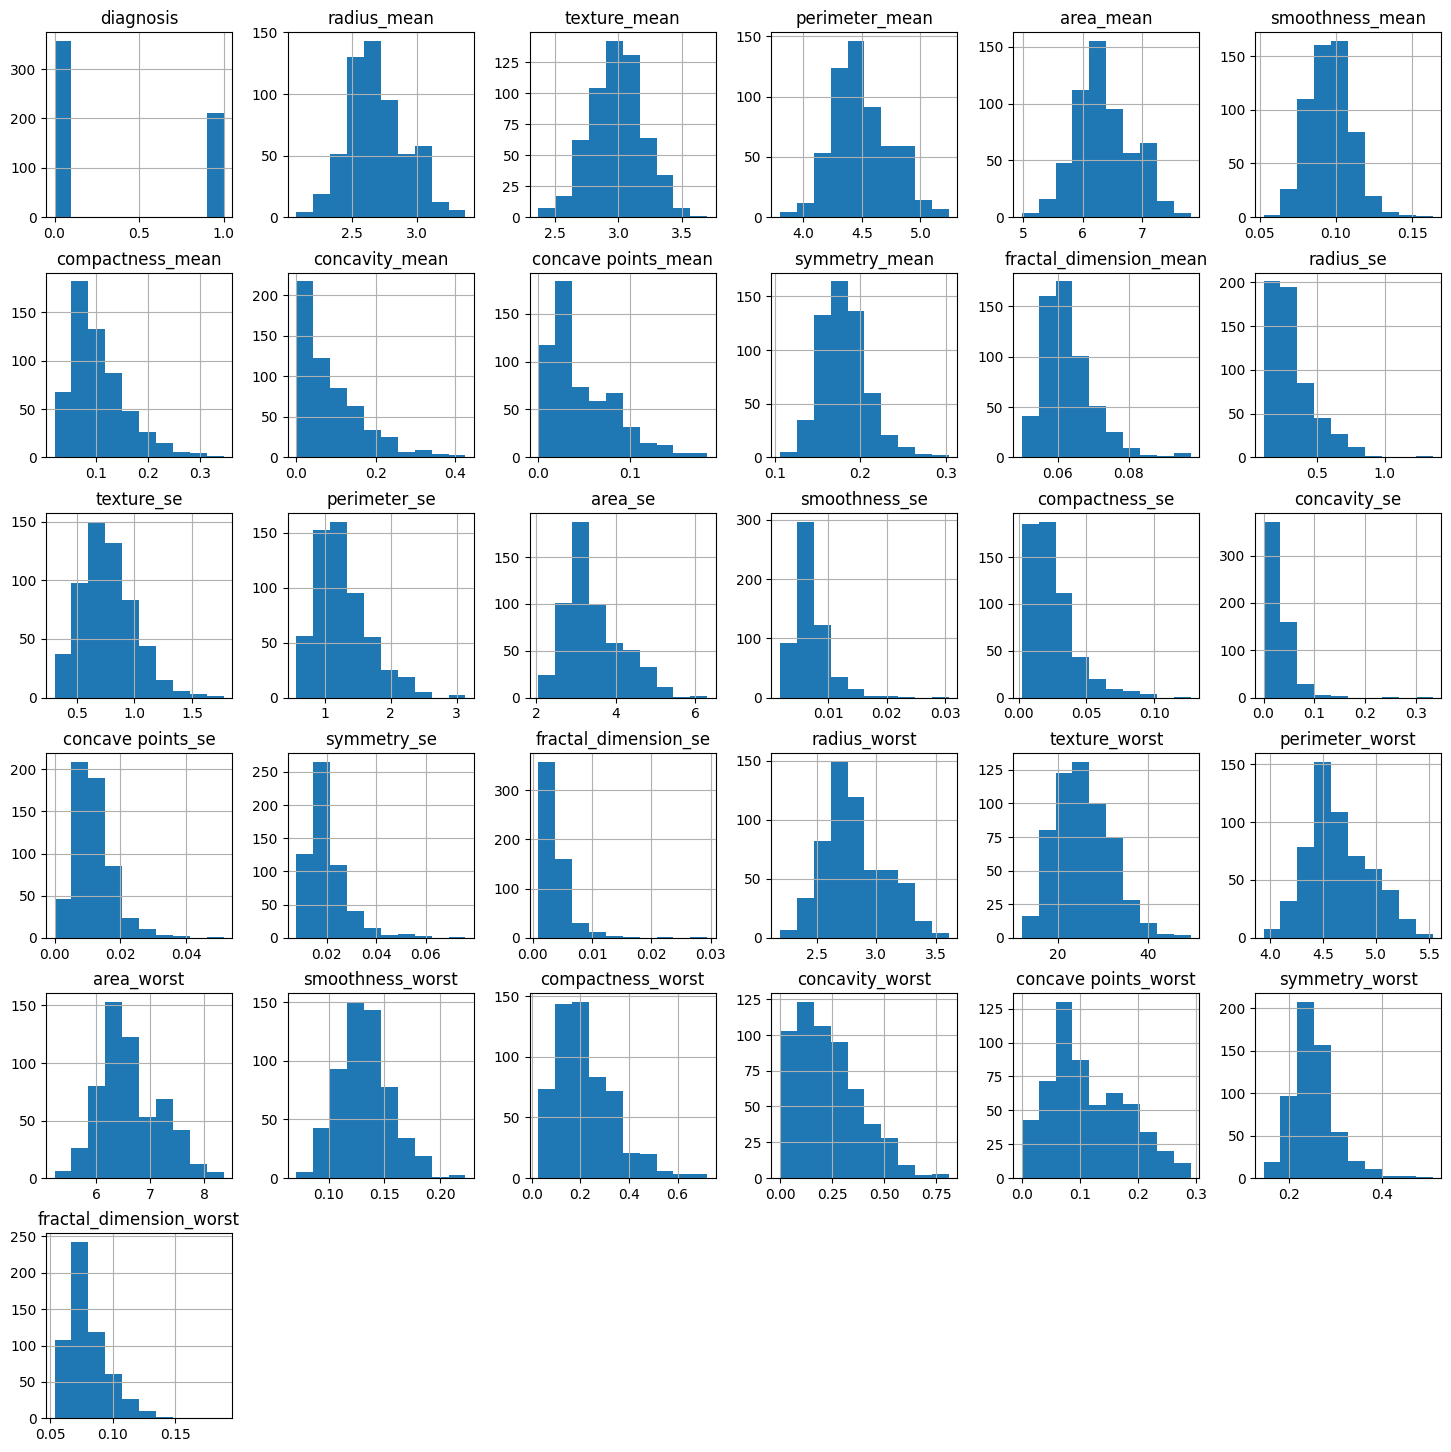

In [17]:
data.hist(figsize=(18, 18))

In [18]:
data.skew()

diagnosis                  0.528461
radius_mean                0.348744
texture_mean               0.018733
perimeter_mean             0.328800
area_mean                  0.287328
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.083180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  1.713417
texture_se                 0.629526
perimeter_se               1.025375
area_se                    0.847298
smoothness_se              2.283394
compactness_se             1.816278
concavity_se               4.231738
concave points_se          1.399869
symmetry_se                2.135874
fractal_dimension_se       3.874373
radius_worst               0.506347
texture_worst              0.498321
perimeter_worst            0.462758
area_worst                 0.457614
smoothness_worst           0.415426
compactness_worst          1.048729
concavity_worst            0

**Still huge number of the values are positive skewed or right-tailed skewed. We need to apply yeo-jhonson transform which works for both the skewness unlike: logartihmic transform which only works for the positive values.**

In [19]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson")
data[["compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "compactness_worst", "concavity_worst", "symmetry_worst", "fractal_dimension_worst"]] = pt.fit_transform(data[["compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "compactness_worst", "concavity_worst", "symmetry_worst", "fractal_dimension_worst"]])

**Applying the yeo-jhonson transform to those values that are still highly skewed.**

In [20]:
data.skew()

diagnosis                  0.528461
radius_mean                0.348744
texture_mean               0.018733
perimeter_mean             0.328800
area_mean                  0.287328
smoothness_mean            0.456324
compactness_mean           0.105564
concavity_mean             0.223924
concave points_mean        0.184252
symmetry_mean             -0.016675
fractal_dimension_mean     0.036216
radius_se                  0.137224
texture_se                 0.003532
perimeter_se               0.036213
area_se                    0.027175
smoothness_se              0.082361
compactness_se             0.196145
concavity_se               0.127735
concave points_se         -0.038459
symmetry_se                0.131471
fractal_dimension_se       0.232453
radius_worst               0.506347
texture_worst              0.498321
perimeter_worst            0.462758
area_worst                 0.457614
smoothness_worst           0.415426
compactness_worst          0.064258
concavity_worst            0

**Now, every data are perfectly skewed and can be utilized for the model.**

array([[<Axes: title={'center': 'diagnosis'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'cent

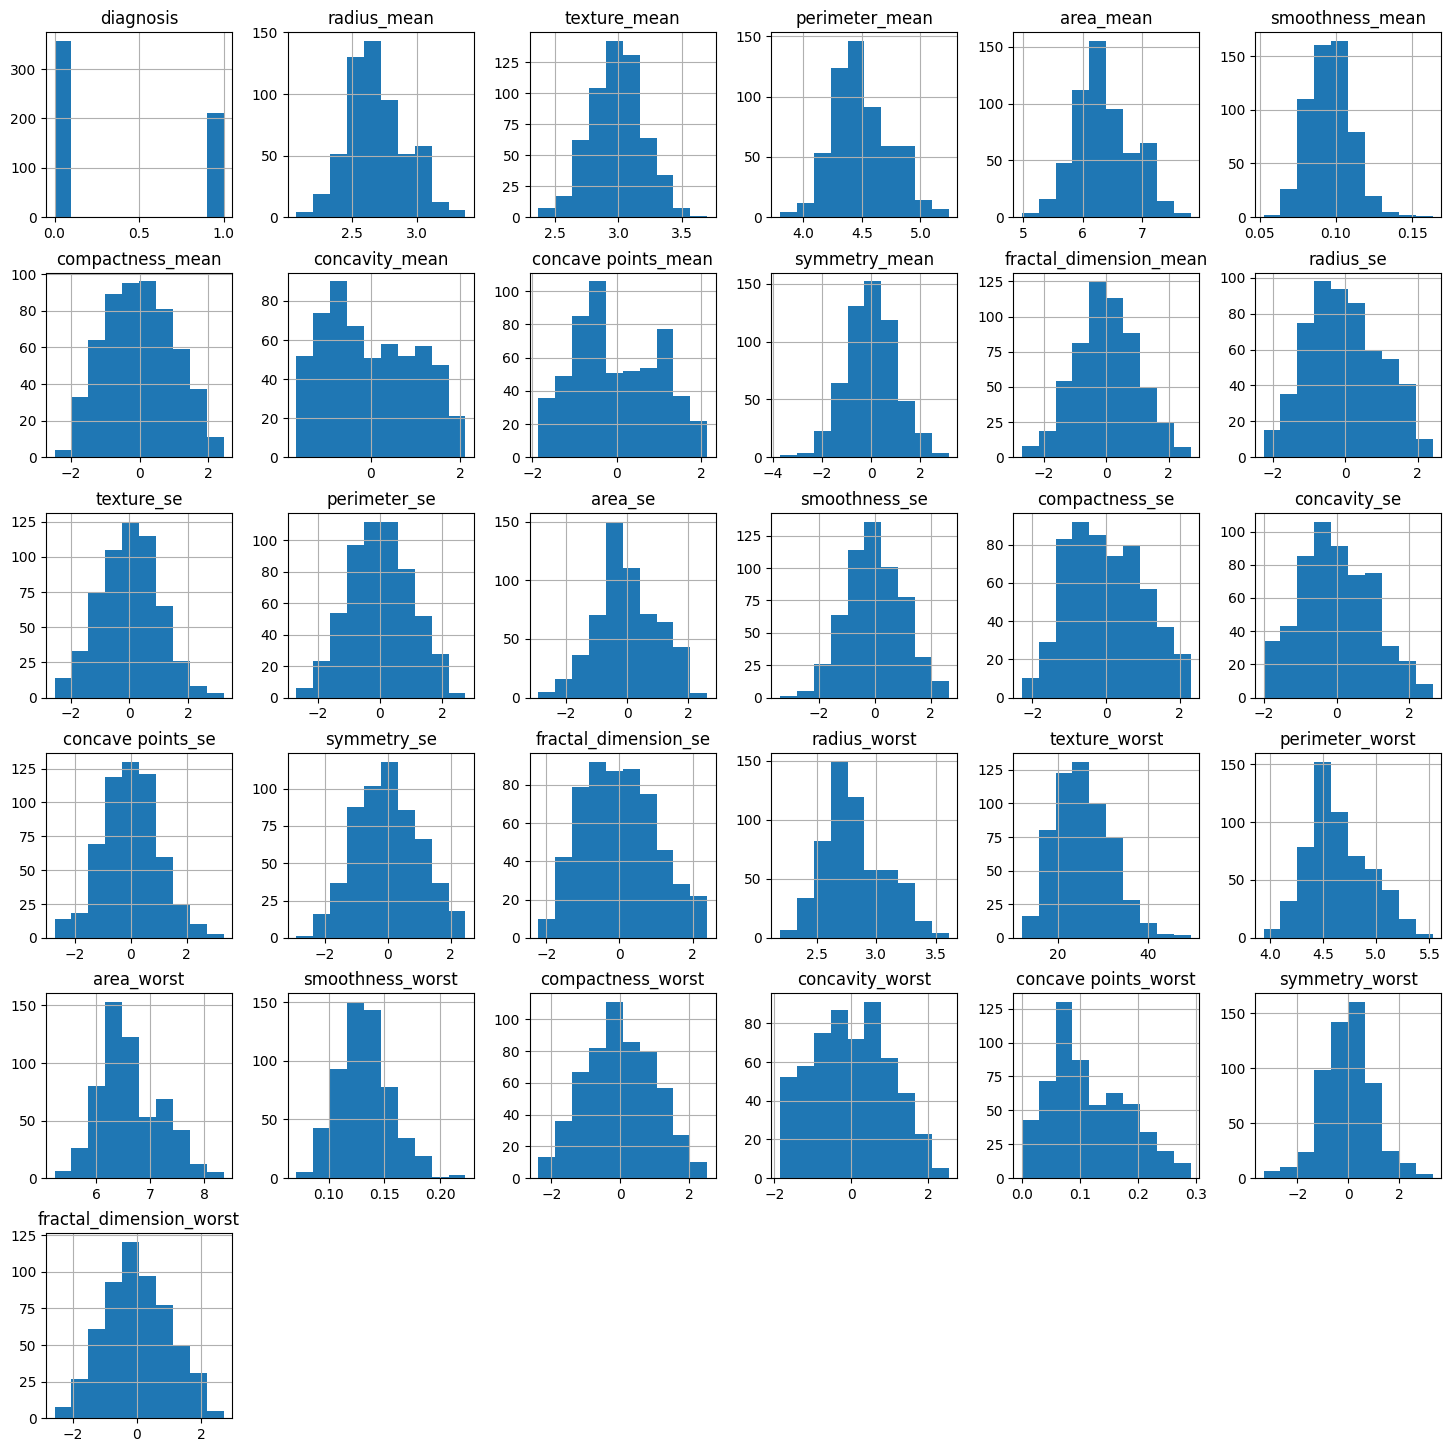

In [21]:
data.hist(figsize=(18,18))

**The histograms are now perfectly skewed as seen above.**

---

<h2 style="font-weight: 600"> 4. Data Visualization </h2>

<Axes: >

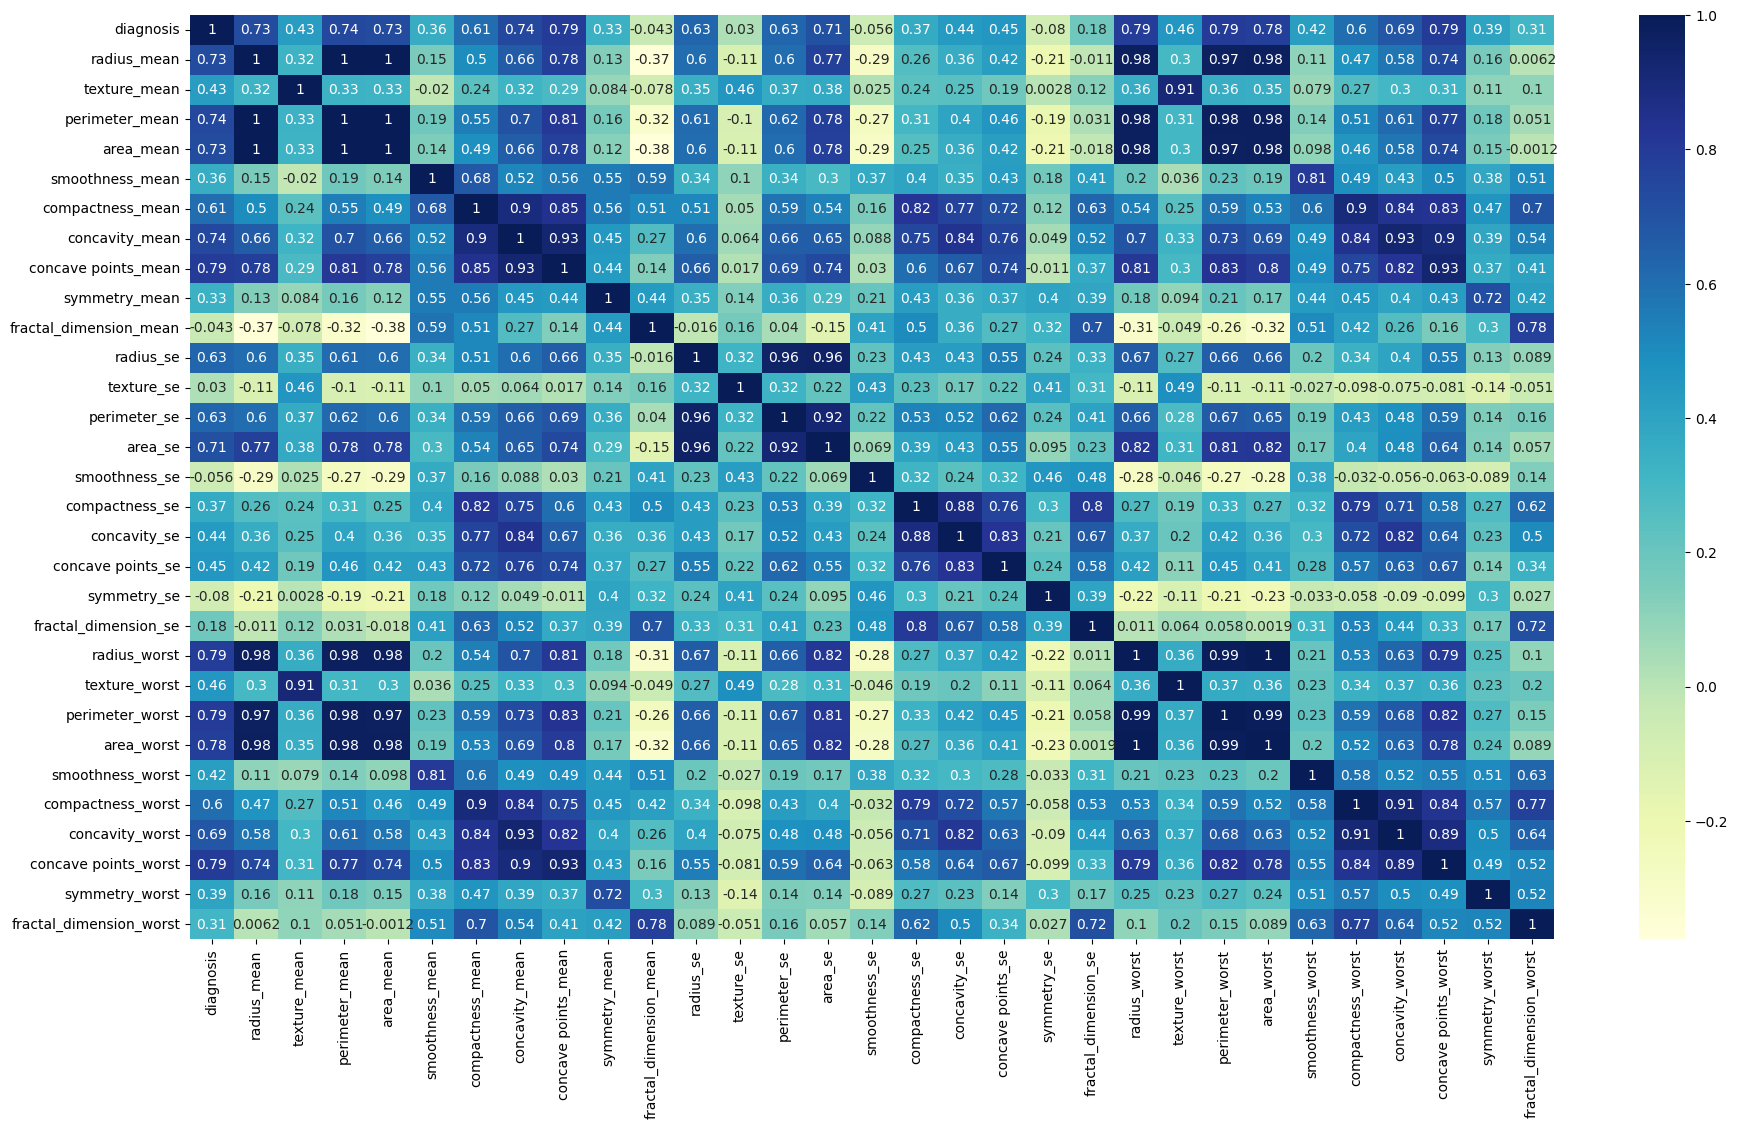

In [22]:
plt.figure(figsize=(22, 12))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

**This heatmap shows the correlation of the different features and their correlation with the target_value.**

In [23]:
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.727980,0.428202,0.741996,0.727979,0.358560,0.606377,0.744514,0.793517,0.333833,...,0.786108,0.456903,0.793910,0.784118,0.421465,0.601650,0.686227,0.793566,0.393709,0.307568
radius_mean,0.727980,1.000000,0.324950,0.998017,0.999465,0.152087,0.497895,0.664307,0.783015,0.132467,...,0.975933,0.299314,0.971613,0.975917,0.105461,0.468126,0.578144,0.741947,0.160578,0.006217
texture_mean,0.428202,0.324950,1.000000,0.329730,0.326360,-0.019705,0.241060,0.320614,0.286705,0.084286,...,0.355007,0.908691,0.360000,0.354427,0.078704,0.268307,0.304615,0.306587,0.105779,0.101152
perimeter_mean,0.741996,0.998017,0.329730,1.000000,0.997281,0.188234,0.545437,0.700965,0.811199,0.163410,...,0.976416,0.305471,0.976866,0.976047,0.136902,0.511597,0.614762,0.770810,0.184255,0.051139
area_mean,0.727979,0.999465,0.326360,0.997281,1.000000,0.140885,0.487607,0.659508,0.778004,0.123527,...,0.977022,0.301981,0.972417,0.978046,0.098204,0.461863,0.575168,0.736811,0.154673,-0.001191
smoothness_mean,0.358560,0.152087,-0.019705,0.188234,0.140885,1.000000,0.679870,0.517039,0.563219,0.553851,...,0.201604,0.036072,0.225814,0.188693,0.805324,0.488869,0.426691,0.503053,0.383789,0.508881
compactness_mean,0.606377,0.497895,0.241060,0.545437,0.487607,0.679870,1.000000,0.895775,0.849370,0.557739,...,0.539988,0.247271,0.590043,0.527397,0.595711,0.903191,0.839232,0.829228,0.466296,0.695425
concavity_mean,0.744514,0.664307,0.320614,0.700965,0.659508,0.517039,0.895775,1.000000,0.934161,0.451521,...,0.696893,0.326672,0.734826,0.690041,0.486759,0.838854,0.931870,0.902501,0.391264,0.539563
concave points_mean,0.793517,0.783015,0.286705,0.811199,0.778004,0.563219,0.849370,0.934161,1.000000,0.437612,...,0.807463,0.296554,0.831840,0.800313,0.489724,0.752122,0.824194,0.933591,0.366936,0.410491
symmetry_mean,0.333833,0.132467,0.084286,0.163410,0.123527,0.553851,0.557739,0.451521,0.437612,1.000000,...,0.177895,0.093703,0.205276,0.166534,0.437884,0.449381,0.396349,0.427899,0.723280,0.422936


---

<h2 style="font-weight: 600"> 5. Feature Engineering </h2>

In [24]:
data['compactness_per_area_mean'] = data['compactness_mean'] / data['area_mean']
data['compactness_per_area_se'] = data['compactness_se'] / data['area_se']
data['compactness_per_area_worst'] = data['compactness_worst'] / data['area_worst']

**What it measures: How “tight” or “irregular” the shape of the tumor is relative to its size.**

In [25]:
data['concave_points_per_perimeter_mean'] = data['concave points_mean'] / data['perimeter_mean']
data['concave_points_per_perimeter_se'] = data['concave points_se'] / data['perimeter_se']
data['concave_points_per_perimeter_worst'] = data['concave points_worst'] / data['perimeter_worst']

**What it measures: How many % of the total edge has dents on it. Concave Points measures the dents in the edges of the cells. While Perimeter is the total edge that the cell has.**

In [26]:
data['texture_per_area_mean'] = data['texture_mean'] / data['area_mean']
data['texture_per_area_se'] = data['texture_se'] / data['area_se']
data['texture_per_area_worst'] = data['texture_worst'] / data['area_worst']

**Why useful: Captures internal variability per unit size. Measures the percentage of texture (roughness or smoothness) over the total cell (area).**

In [27]:
data['fractal_dimension_per_perimeter_mean'] = data['fractal_dimension_mean'] / data['perimeter_mean']
data['fractal_dimension_per_perimeter_se'] = data['fractal_dimension_se'] / data['perimeter_se']
data['fractal_dimension_per_perimeter_worst'] = data['fractal_dimension_worst'] / data['perimeter_worst']

**Measures boundary complexity normalized by edge length. Measures the percentage of how complicated or jagged the cell boundary looks over the total edge of the cell.**

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   diagnosis                              569 non-null    int64  
 1   radius_mean                            569 non-null    float64
 2   texture_mean                           569 non-null    float64
 3   perimeter_mean                         569 non-null    float64
 4   area_mean                              569 non-null    float64
 5   smoothness_mean                        569 non-null    float64
 6   compactness_mean                       569 non-null    float64
 7   concavity_mean                         569 non-null    float64
 8   concave points_mean                    569 non-null    float64
 9   symmetry_mean                          569 non-null    float64
 10  fractal_dimension_mean                 569 non-null    float64
 11  radius

**The dataframe now consists of additional 12 new columns or features added to understand and predict the output more perfectly.**

In [29]:
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_per_area_worst,concave_points_per_perimeter_mean,concave_points_per_perimeter_se,concave_points_per_perimeter_worst,texture_per_area_mean,texture_per_area_se,texture_per_area_worst,fractal_dimension_per_perimeter_mean,fractal_dimension_per_perimeter_se,fractal_dimension_per_perimeter_worst
diagnosis,1.000000,0.727980,0.428202,0.741996,0.727979,0.358560,0.606377,0.744514,0.793517,0.333833,...,0.583731,0.784494,-3.258074e-02,0.768528,-0.284935,-5.726817e-02,0.191209,-0.043635,-6.692203e-02,0.300521
radius_mean,0.727980,1.000000,0.324950,0.998017,0.999465,0.152087,0.497895,0.664307,0.783015,0.132467,...,0.455585,0.775632,-1.130234e-02,0.691623,-0.614914,-2.354000e-02,-0.046947,-0.374260,-5.000356e-02,-0.002420
texture_mean,0.428202,0.324950,1.000000,0.329730,0.326360,-0.019705,0.241060,0.320614,0.286705,0.084286,...,0.255923,0.278649,2.922470e-03,0.286499,0.539150,-3.595496e-02,0.844204,-0.081405,3.114204e-02,0.093657
perimeter_mean,0.741996,0.998017,0.329730,1.000000,0.997281,0.188234,0.545437,0.700965,0.811199,0.163410,...,0.499214,0.804483,-1.378016e-02,0.723227,-0.609823,-2.285300e-02,-0.040842,-0.327817,-5.004643e-02,0.042191
area_mean,0.727979,0.999465,0.326360,0.997281,1.000000,0.140885,0.487607,0.659508,0.778004,0.123527,...,0.449815,0.771346,-1.124159e-02,0.686553,-0.615419,-2.516394e-02,-0.045232,-0.385535,-5.051345e-02,-0.009977
smoothness_mean,0.358560,0.152087,-0.019705,0.188234,0.140885,1.000000,0.679870,0.517039,0.563219,0.553851,...,0.481950,0.561773,-4.977703e-02,0.522748,-0.136462,4.086665e-02,-0.037549,0.588160,-1.537494e-02,0.508370
compactness_mean,0.606377,0.497895,0.241060,0.545437,0.487607,0.679870,1.000000,0.895775,0.849370,0.557739,...,0.896825,0.848334,-4.715621e-02,0.839058,-0.225674,1.349871e-02,0.064273,0.512168,-2.529934e-02,0.693983
concavity_mean,0.744514,0.664307,0.320614,0.700965,0.659508,0.517039,0.895775,1.000000,0.934161,0.451521,...,0.832845,0.931185,-2.644652e-02,0.902252,-0.309933,-9.093754e-03,0.090176,0.265638,-3.140132e-02,0.539013
concave points_mean,0.793517,0.783015,0.286705,0.811199,0.778004,0.563219,0.849370,0.934161,1.000000,0.437612,...,0.743054,0.998292,-3.760002e-02,0.924646,-0.446928,9.920433e-03,0.014018,0.132198,-4.209931e-02,0.406726
symmetry_mean,0.333833,0.132467,0.084286,0.163410,0.123527,0.553851,0.557739,0.451521,0.437612,1.000000,...,0.436986,0.431744,-7.054434e-02,0.438017,-0.030401,8.487550e-03,0.037042,0.433790,-7.233981e-03,0.417923


<Axes: >

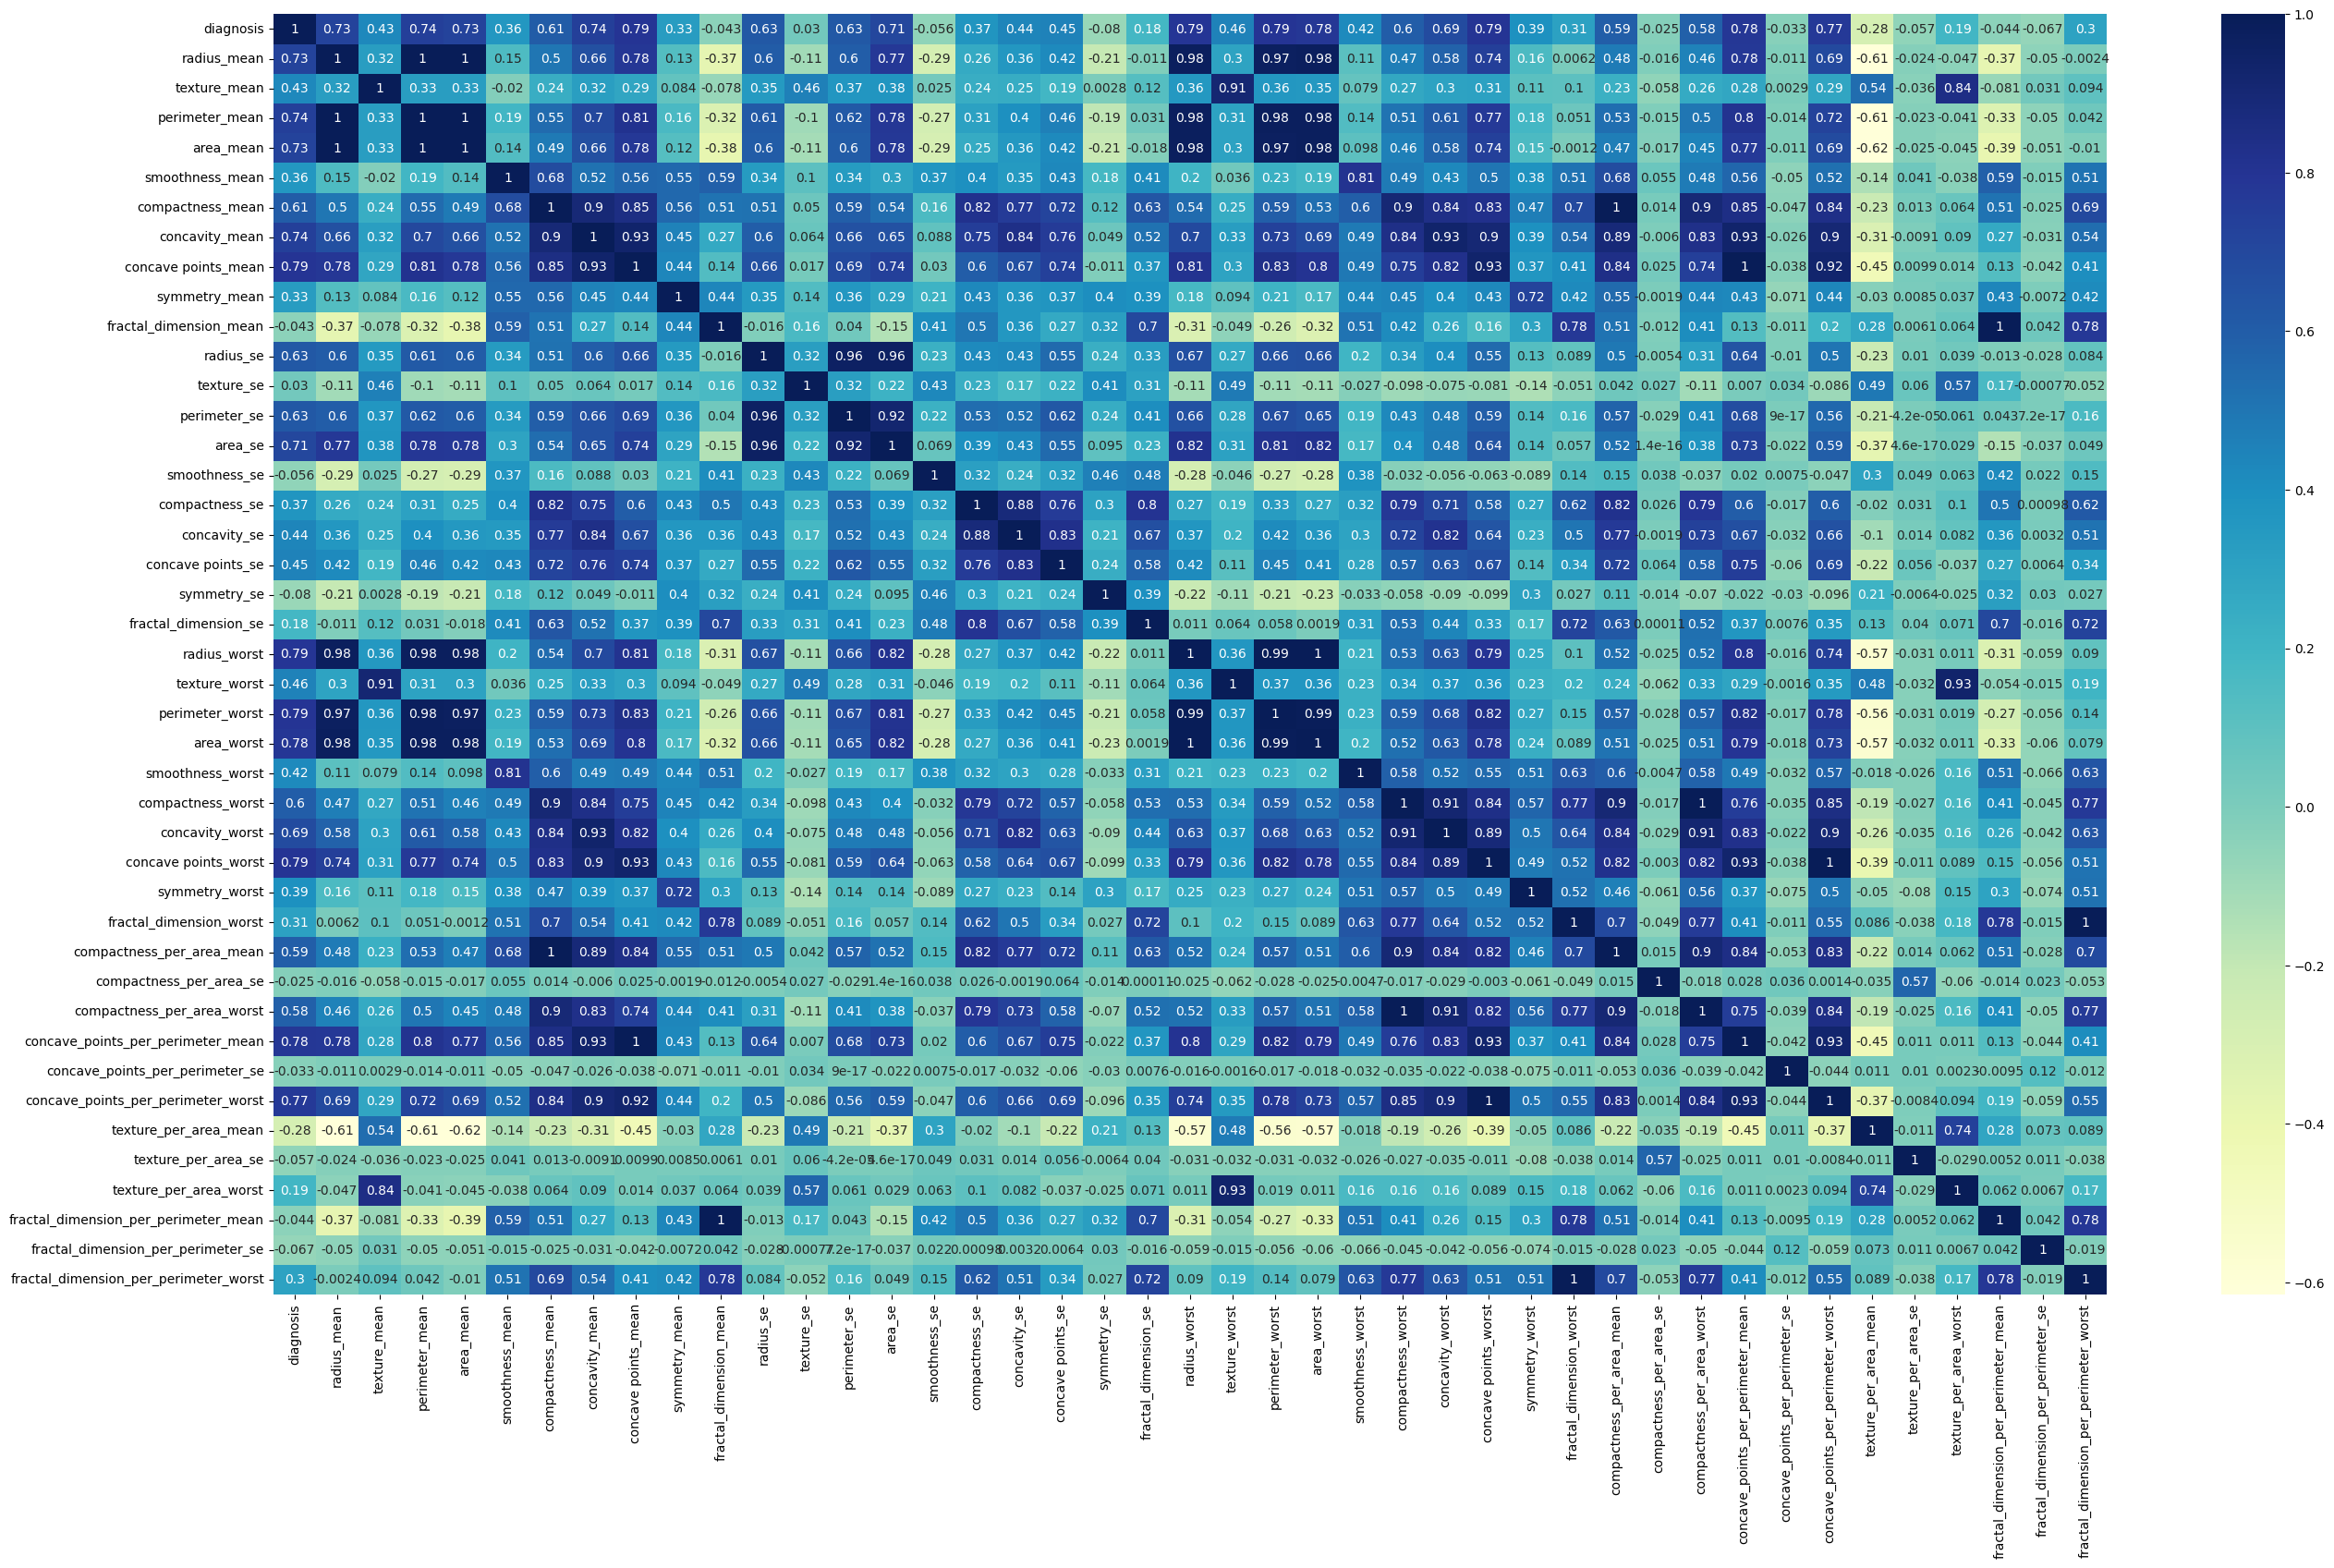

In [30]:
plt.figure(figsize=(32, 18))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

**As, seen above the new features like: concave_points_per_perimeter_mean has around 0.784 correlation with the diagnosis, also concave_points_per_perimeter_worst has 0.768 correlation with the output. Meaning the relationship between concave_points and perimeter is significant.**

---

<h2 style="font-weight: 600"> 6. Scaling And Splitting The Data </h2>

In [31]:
x = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

**Here, x will be all of the features used in the data. Whereas the y will be the target_value(daignosis) which must be predicted by the model.**

In [32]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,compactness_per_area_worst,concave_points_per_perimeter_mean,concave_points_per_perimeter_se,concave_points_per_perimeter_worst,texture_per_area_mean,texture_per_area_se,texture_per_area_worst,fractal_dimension_per_perimeter_mean,fractal_dimension_per_perimeter_se,fractal_dimension_per_perimeter_worst
0,2.943913,2.431857,4.818667,6.909753,0.11840,2.165938,1.862988,1.842826,1.953067,1.886398,...,0.254184,0.382435,0.411563,0.050808,0.351946,-0.261735,2.277012,0.391477,0.683734,0.329317
1,3.071303,2.932260,4.897093,7.190676,0.08474,-0.384102,0.291976,0.820831,0.102291,-0.956577,...,-0.037673,0.167616,0.588879,0.036658,0.407786,-0.786770,3.088730,-0.195336,0.260583,0.105921
2,3.029650,3.102342,4.875197,7.093405,0.10960,1.163977,1.403673,1.676269,0.985668,-0.292433,...,0.160919,0.343836,1.192591,0.048275,0.437356,-0.558017,3.429493,-0.059984,0.624209,0.090293
3,2.519308,3.062456,4.364117,5.958683,0.14250,2.197843,1.642391,1.417090,2.360528,2.708925,...,0.362214,0.324714,1.592529,0.055931,0.513948,1.888787,4.177601,0.620727,2.596950,0.548991
4,3.058237,2.730464,4.913390,7.168580,0.10030,0.762392,1.407479,1.405105,0.090964,-0.511332,...,-0.016506,0.285975,0.849286,0.032295,0.380893,-0.568023,2.264132,-0.104069,0.683662,-0.055127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,3.116178,3.152309,4.962845,7.299797,0.11100,0.460810,1.653784,1.776671,-0.232645,-1.053698,...,-0.008927,0.357995,0.996022,0.043293,0.431835,0.157606,3.466930,-0.212317,0.316435,-0.146512
565,3.050694,3.375880,4.884316,7.140453,0.09780,0.207602,0.984746,1.315662,-0.129120,-1.259564,...,-0.031431,0.269365,0.685763,0.032239,0.472782,1.214655,5.129387,-0.257879,-0.402130,-0.239761
566,2.867899,3.370051,4.694096,6.755885,0.08455,0.183969,0.375105,0.400930,-0.808189,-0.998237,...,0.089057,0.085412,1.037358,0.029239,0.498832,-0.093383,4.856567,-0.212658,0.541915,-0.034830
567,3.072693,3.412137,4.949469,7.143618,0.11780,2.162820,1.994466,1.879202,1.899087,1.147810,...,0.306390,0.379677,0.610453,0.050731,0.477648,0.618729,5.250616,0.231906,0.891180,0.353745


In [33]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

**Here, it is essential to split the dataframe into x and y as x represents the independent variables while y is the target variable needed to predict.**

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Here, test_size = 0.2 means 80% for training and 20% for evaluating for testing. Also, random_state = 42 helps in reproduction as it’s random, every time you run the code, you might get a different split. That means your model’s performance could also change slightly each time. Hence, making it 42 means making it universal.**

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)  
x_test_s = scaler.transform(x_test)

**Here, we have properly scaled the both features of the training and testing values. Fit_Transform() helps the model to learn from the data like: mean, mode, standard deviations. And Transform() helps the model to re-train on the different data-set(testing) without wanting to re-learn again giving us the different values.**

---

<h2 style="font-weight: 600"> 7. Logistics Regression </h2>

In [36]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train_s, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


**Training the logistics regression model.**

In [37]:
reg.score(x_test_s, y_test)

0.9736842105263158

**The coefficient of determination for the entire logisitics regression is around 97.36% meaning that 97.36% variance or changes in the target_value can be explained or determined by the features.**

In [38]:
y_predict = reg.predict(x_test_s)
y_predict

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

**y_predict includes the array of all the predicted values where 1 'Maligant' or Cancer+ and 0 'Benign' or Cancer- as binary encodings.**

---

<h2 style="font-weight: 600; text-align: center"> Evaluation Of Logistics Regression </h2>

In [39]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

In [40]:
precision

0.9761904761904762

In [41]:
recall

0.9534883720930233

In [42]:
f1

0.9647058823529412

In [43]:
accuracy

0.9736842105263158

**The evaluation of the model:**
<br />
<ul>
    <li>True Positive (TP): Predicted: 1 (malignant), Actual: 1 (malignant)</li>
    <li>True Negative (TN): Predicted: 0 (benign), Actual: 0 (benign)</li>
    <li>False Positive (FP): Predicted: 1 (malignant), Actual: 0 (benign)</li>
    <li>False Negative (FN): Predicted: 0 (benign), Actual: 1 (malignant)</li>
</ul>
<br/>

<ol>
    <li>Precision: Out of all the times your model predicted 1 (malignant), how many were actually 1?</li>
    <ul>
        <li>Precision = TP/(TP+FP)</li>
    </ul>
    <li>Recall: Out of all the actual 1’s in your dataset, how many did your model correctly predict as 1?</li>
    <ul>
        <li>Recall = TP/(TP+FN)</li>
    </ul>
    <li>F1 Score: The balance between precision and recall. Harmonic Mean</li>
    <ul>
        <li>F1 = 2 * [(Precision * Recall)/(Precision + Recall)]</li>
    </ul>
</ol>

In [44]:
from sklearn.metrics import classification_report
classification_report(y_test, y_predict, target_names=["Benign", "Malignant"])

'              precision    recall  f1-score   support\n\n      Benign       0.97      0.99      0.98        71\n   Malignant       0.98      0.95      0.96        43\n\n    accuracy                           0.97       114\n   macro avg       0.97      0.97      0.97       114\nweighted avg       0.97      0.97      0.97       114\n'

**Evaluation of the entire model:**
<br />
<ol>
    <li>For Benign (non-cancer) cases: </li>
    <ul>
        <li>Precision = 0.97 → When the model says “Benign,” it is correct 97% of the time.</li>
        <li>Recall = 0.99 → Out of all actual Benign cases, the model correctly identifies 99% of them.</li>
        <li>F1-score = 0.98 → The model is very accurate and reliable for Benign cases.</li>
        <li>Support = 71 → There are 71 actual Benign samples in the dataset.</li>
    </ul>
    <li>For Malignant (cancer) cases: </li>
    <ul>
        <li>Precision = 0.98 → When the model says “Malignant,” it is correct 98% of the time.</li>
        <li>Recall = 0.95 → Out of all actual Malignant cases, the model correctly identifies 95% of them.</li>
        <li>F1-score = 0.96 → The model is very accurate and reliable for Malignant cases, but slightly lower recall than Benign.</li>
        <li>Support = 43 → There are 43 actual Malignant samples in the dataset.</li>
    </ul>
    <li>Overall performance: </li>
    <ul>
        <li>Accuracy = 0.97 → The model predicts correctly 97% of the time overall.</li>
        <li>Macro Avg = 0.97 → Average of metrics across both classes, ignoring how many samples are in each class.</li>
        <li>Weighted Avg = 0.97 → Average of metrics across both classes, weighted by the number of samples in each class (more realistic).</li>
    </ul>
</ol>

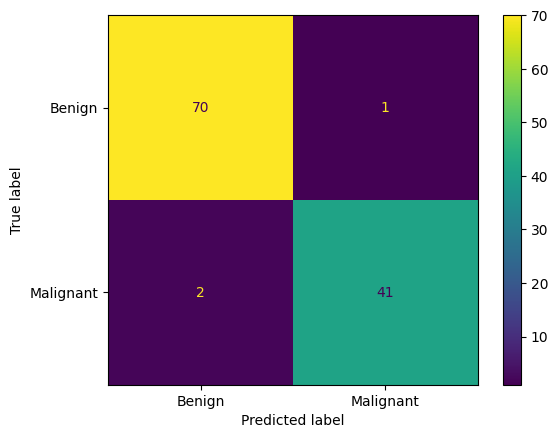

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Benign", "Malignant"])
disp.plot()

**Interpretation: Out of 114 total evaluation values(test_values):**
<br />
<ul>
    <li>70 (True Positive): Predicted Benign, actually Benign.</li>
    <li>1 (False Negative): Predicted Malignant, actually Benign.</li>
    <li>2 (False Positive): Predicted Benign, actually Malignant.</li>
    <li>41 (True Negative): Predicted Malignant, actually Malignant.</li>
</ul>
<br />

**We have correctly predicted: 111 out of 114 total data.**

---

<h2 style="font-weight: 600; text-align: center">8. Random Forest Model </h2>

In [46]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_jobs = -1, random_state = 42)
forest.fit(x_train_s, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Using the random forest model from the ensemble learning to increase the prediction accuracy.**

In [47]:
forest.score(x_test_s, y_test)

0.956140350877193

**The coefficient of determination for the entire random forest classifier is around 96.49% meaning that 96.49% variance or changes in the target_value can be explained or determined by the features.**

Text(0.5, 1.0, 'Random Forest Feature And Importances')

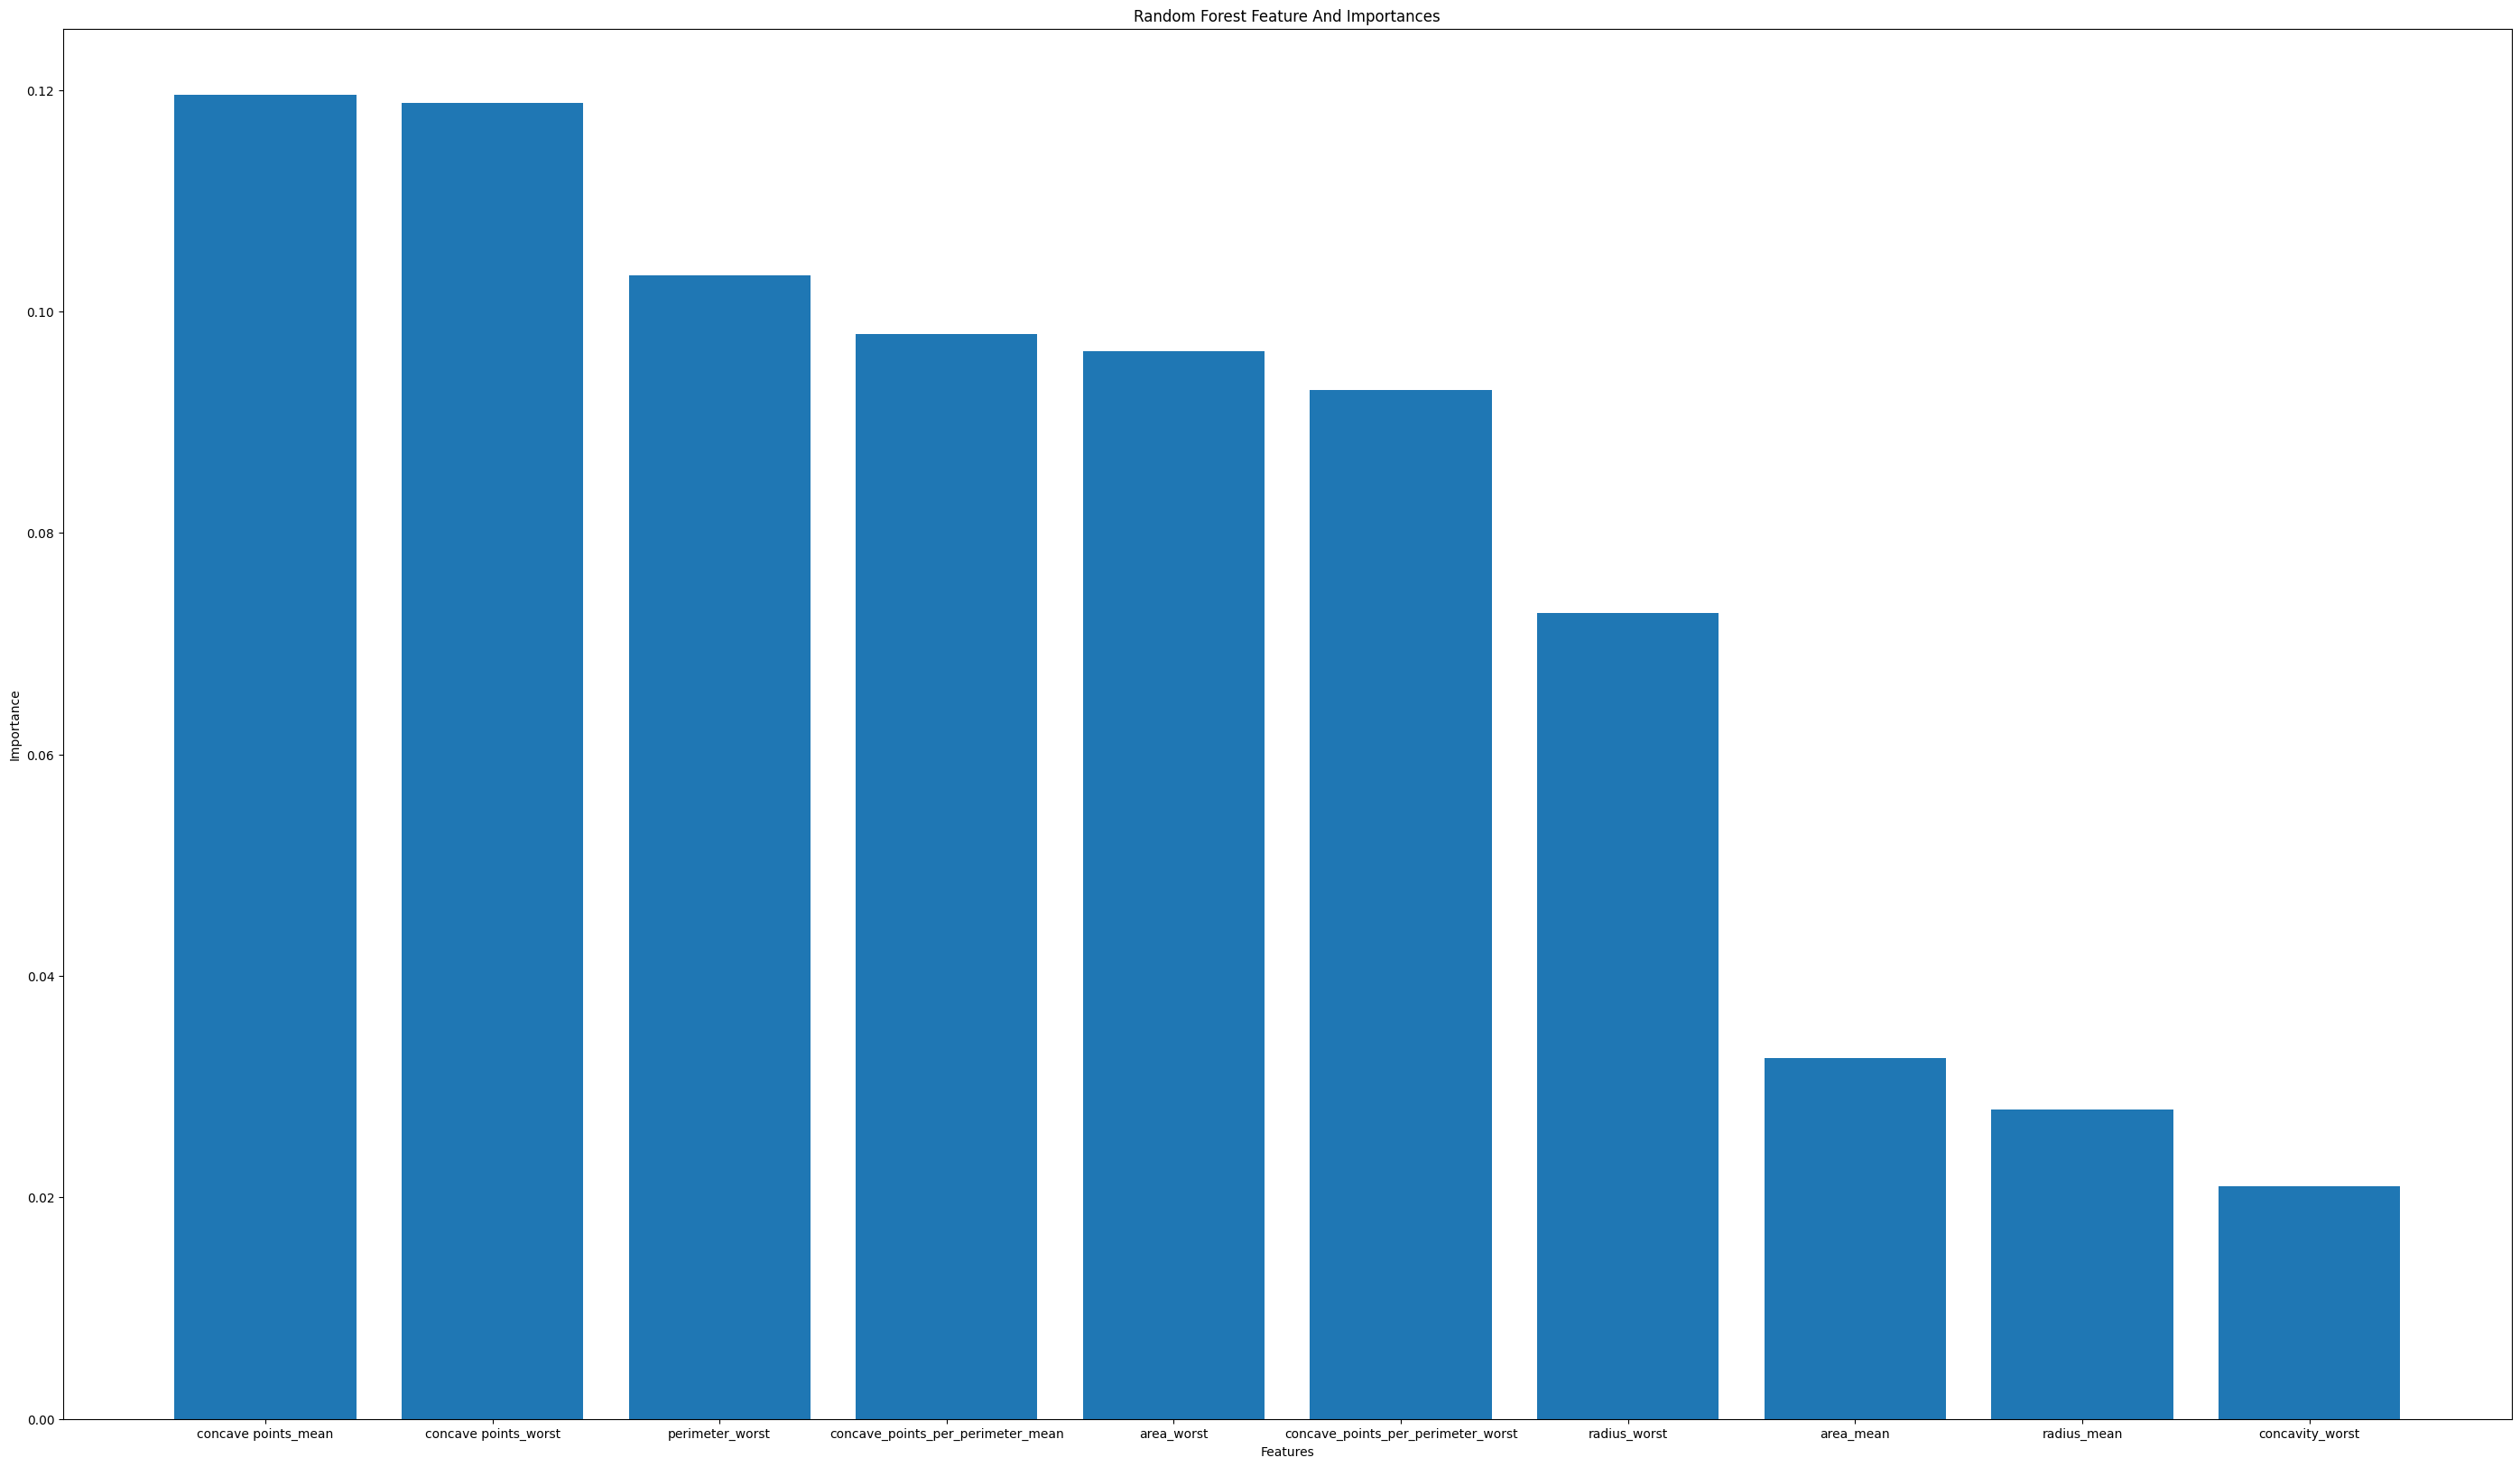

In [48]:
top_indices = np.argsort(forest.feature_importances_)[-10:][::-1]
plt.figure(figsize=(35, 20))
plt.bar(x_train.columns[top_indices], forest.feature_importances_[top_indices])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Random Forest Feature And Importances")

**The developed feature: concave_points_per_perimeter_mean and concave_points_per_perimeter_worst both were one of the significant contibutors towards the prediction model. So, our feature engineering was significant.**

In [49]:
y_predict = forest.predict(x_test_s)
y_predict

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1], dtype=int64)

**The prediction values given by the random forest classifier.**

---

<h2 style="font-weight: 600; text-align: center"> Evaluation Of Random Forest Classifier </h2>

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

In [51]:
precision

0.9523809523809523

In [52]:
recall

0.9302325581395349

In [53]:
f1

0.9411764705882353

In [54]:
accuracy

0.956140350877193

**This will measure the precision, recall, f1 and accuracy score of the random forest model.**

In [55]:
classification_report(y_test, y_predict, target_names=["Benign", "Malignant"])

'              precision    recall  f1-score   support\n\n      Benign       0.96      0.97      0.97        71\n   Malignant       0.95      0.93      0.94        43\n\n    accuracy                           0.96       114\n   macro avg       0.96      0.95      0.95       114\nweighted avg       0.96      0.96      0.96       114\n'

**This will provide the overall metrics of the model.**

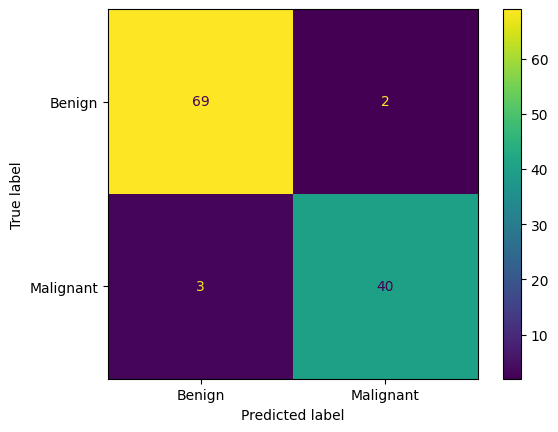

In [56]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Benign", "Malignant"])
disp.plot()

**This will show the confusion matrix of the random forest model.**
<br />
**TP => 70 (70 predictions for the Benign were correct.)**
<br />
**TN => 40 (40 predictions for the Malignant were correct.)**
<br />
**FP => 3 (3 predictions about the Benign were incorrect.)**
<br />
**FN => 1 (1 prediction for the Malignant was incorrect.)**

In [57]:
y_test.value_counts()

diagnosis
0    71
1    43
Name: count, dtype: int64

**Total Testing Data: Benign (0) = 71 & Malignant (1) = 43**

---

<h2 style="font-weight: 600; text-align: center">9. Hyper Parameter Tuned Model </h2>

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_features": [2, 4, 6],
    "min_samples_split": [2, 4, 6],
    "max_depth": [2, 4, 8]
}
gridSearch = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, verbose=2, return_train_score=True)
gridSearch.fit(x_train_s, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [2, 4, ...], 'max_features': [2, 4, ...], 'min_samples_split': [2, 4, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,100


**The hyper-parameter tuning will help to develop an efficient model with fixed settings to boost it's efficiency.**

In [59]:
best_model = gridSearch.best_estimator_
best_model.fit(x_train_s, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,6
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Fitting the training data into the hyper-parameter tuned model configured with the best-estimators.**

In [60]:
y_predict = best_model.predict(x_test_s)
y_predict

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

**Predicting the scores with the hyper-parameter tuned model.**

---

<h2 style="font-weight: 600; text-align: center"> Evaluation Of Hyper-Parameter Tuned Classifier </h2>

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

In [62]:
precision

0.975609756097561

In [63]:
recall

0.9302325581395349

In [64]:
f1

0.9523809523809523

In [65]:
accuracy

0.9649122807017544

**This will measure the precision, recall, f1 and accuracy score of the hyper tuned model.**

In [66]:
classification_report(y_test, y_predict, target_names=["Benign", "Malignant"])

'              precision    recall  f1-score   support\n\n      Benign       0.96      0.99      0.97        71\n   Malignant       0.98      0.93      0.95        43\n\n    accuracy                           0.96       114\n   macro avg       0.97      0.96      0.96       114\nweighted avg       0.97      0.96      0.96       114\n'

**This will provide the overall metrics of the model.**

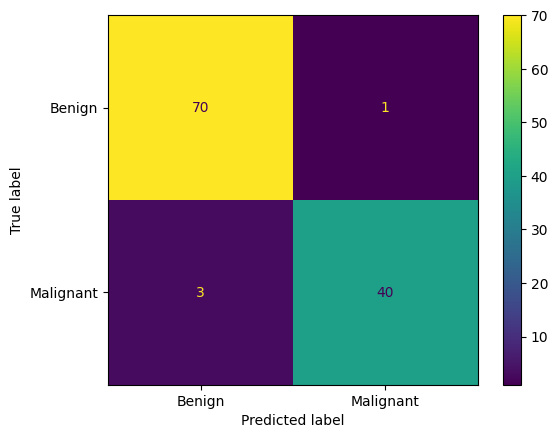

In [67]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Benign", "Malignant"])
disp.plot()

**This will show the confusion matrix of the random forest model.**
<br />
**TP => 70 (70 predictions for the Benign were correct.)**
<br />
**TN => 40 (40 predictions for the Malignant were correct.)**
<br />
**FP => 3 (3 predictions about the Benign were incorrect.)**
<br />
**FN => 1 (1 prediction for the Malignant was incorrect.)**
<br />
**Total Value Count: 71 Benign and 43 Malignant**

In [68]:
y_test.value_counts()

diagnosis
0    71
1    43
Name: count, dtype: int64

**This shows the total value counts for the entire test dataset which is correctly equivalent to 71 and 43**

---